In [4]:
import os
import pandas as pd
import ROOT
from array import array
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from tableauColors import palette

Welcome to JupyROOT 6.18/00


In [5]:
DATA_DIR = '/groups/hep/mojen/repositories/DREAM/Analysis'
# DATA_DIR = '/groups/hep/mojen/repositories/DREAM/Run/final_run/tauolaevts/25000'
# DATA_DIR = '/home/jupyter/DREAM'

fileName = os.path.join(DATA_DIR, 'dfmerged2.csv')
df = pd.read_csv(fileName)
print(df.shape)
df.head()

(12243, 18)


,eventId,clusterId,PrimaryDecayMode,VecShowerEnergy,S_sum,C_sum,S_rad_mean,C_rad_mean,S_hot,C_hot,CoverS,rec_energy,label,comi,comj,label_binary,predictedLabel,predictedEnergy
0,1,1,4,13397.354239,7151.5063,4673.8125,4.663652,3.531102,0.070806,0.058091,0.653542,7799.056950,3,124.297177,127.529336,1.0,3.0,15210.528176
1,1,2,4,10115.048809,11443.4320,8736.7320,2.372905,1.656477,0.260583,0.188679,0.763471,12150.833917,2,135.302284,180.102213,NaN,2.0,11098.627938
2,1,3,4,4740.947309,5503.8794,4518.6650,2.474627,2.093691,0.116771,0.190987,0.820996,5761.367321,2,150.901653,175.728180,NaN,2.0,5603.894921
3,1,4,4,11594.263998,11814.1950,12111.1870,2.684480,1.768877,0.178017,0.168935,1.025139,11736.575496,2,138.098989,156.801442,NaN,2.0,12898.385256
4,1,5,4,2466.543425,2015.4009,1958.7346,2.239408,1.640035,0.152792,0.247525,0.971883,2030.210760,2,157.373331,147.430008,NaN,2.0,2435.022835


In [6]:
df_electron = df.loc[df.label == 0]
df_muon = df.loc[df.label == 1]
df_gamma = df.loc[df.label == 2]
df_pion = df.loc[df.label == 3]

In [7]:
def mape(y_true, y_pred):
    y_true = y_true.reshape([-1,1])
    y_pred = y_pred.reshape([-1,1])
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [8]:
print(mape(df_electron.VecShowerEnergy.values, df_electron.rec_energy.values), mape(df_electron.VecShowerEnergy.values, df_electron.predictedEnergy.values))
print(mape(df_muon.VecShowerEnergy.values, df_muon.rec_energy.values), mape(df_muon.VecShowerEnergy.values, df_muon.predictedEnergy.values))
print(mape(df_gamma.VecShowerEnergy.values, df_gamma.rec_energy.values), mape(df_gamma.VecShowerEnergy.values, df_gamma.predictedEnergy.values))
print(mape(df_pion.VecShowerEnergy.values, df_pion.rec_energy.values), mape(df_pion.VecShowerEnergy.values, df_pion.predictedEnergy.values))

11.894771490074199 3.707518909029802
85.44384231566463 57.311062629577194
24.235703437244275 6.866430130616067
51.03127583061075 22.676163900022058


In [9]:
f = ROOT.TFile('dfmerged2.root', 'recreate' )
t = ROOT.TTree('dfmerged2', 'tree with dfmerged set' )

PrimaryDecayMode = array('i', [0])
VecShowerEnergy = array('d', [0.])
# S_sum = array('d', [0.])
# C_sum = array('d', [0.])
# S_rad_mean = array('d', [0.])
# C_rad_mean = array('d', [0.])
# S_hot = array('d', [0.])
# C_hot = array('d', [0.])
# CoverS = array('d', [0.])
# dist2charge = array('d', [0.])
rec_energy = array('d', [0.])
predictedEnergy = array('d', [0.])
label = array('i', [0])

t.Branch('PrimaryDecayMode', PrimaryDecayMode, "PrimaryDecayMode/I")
t.Branch('VecShowerEnergy', VecShowerEnergy, "VecShowerEnergy/D")
# t.Branch('S_sum', S_sum, "S_sum/D")
# t.Branch('C_sum', C_sum, "C_sum/D")
# t.Branch('S_rad_mean', S_rad_mean, "S_rad_mean/D")
# t.Branch('C_rad_mean', C_rad_mean, "C_rad_mean/D")
# t.Branch('S_hot', S_hot, "S_hot/D")
# t.Branch('C_hot', C_hot, "C_hot/D")
# t.Branch('CoverS', CoverS, "CoverS/D")
# t.Branch('dist2charge', dist2charge, "dist2charge/D")
t.Branch('rec_energy', rec_energy, "rec_energy/D")
t.Branch('predictedEnergy', predictedEnergy, "predictedEnergy/D")
t.Branch('label', label, "label/I")

for i in range(df.shape[0]):
    PrimaryDecayMode[0] = df.PrimaryDecayMode.values[i] 
    VecShowerEnergy[0] = df.VecShowerEnergy.values[i]
#     S_sum[0] = df.S_sum.values[i]
#     C_sum[0] = df.C_sum.values[i]
#     S_rad_mean[0] = df.S_rad_mean.values[i]
#     C_rad_mean[0] = df.C_rad_mean.values[i]
#     S_hot[0] = df.S_hot.values[i]
#     C_hot[0] = df.C_hot.values[i]
#     CoverS[0] = df.CoverS.values[i]
    rec_energy[0] = df.rec_energy.values[i]
    predictedEnergy[0] = df.predictedEnergy.values[i]
#     dist2charge[0] = df.dist2charge.values[i]
    label[0] = df.label.values[i]
    t.Fill()
f.Write()
f.Close()

In [10]:
tdf = ROOT.ROOT.RDataFrame("dfmerged2", "dfmerged2.root")

In [11]:
tdf.AsNumpy()

{'PrimaryDecayMode': numpy.array([4, 4, 4, ..., 4, 4, 4], dtype=int32),
 'VecShowerEnergy': numpy.array([13397.35423879, 10115.04880914,  4740.94730948, ...,
               2976.50804658, 12502.78380393,  2044.41394618]),
 'rec_energy': numpy.array([ 7799.05695005, 12150.83391726,  5761.36732089, ...,
               2838.77680727, 10559.03052977,  1254.76694268]),
 'predictedEnergy': numpy.array([15210.52817606, 11098.62793756,  5603.89492083, ...,
               3431.86299145, 12443.09262952,  2017.95403196]),
 'label': numpy.array([3, 2, 2, ..., 2, 2, 2], dtype=int32)}

In [12]:
tdf2 = tdf

In [15]:
import copy
nbins = 45
binwidth = 1000
# nbins = 90
# binwidth = 500

d = {k: [] for k in ['Energy', 'EnergyRes', 'EnergyResErr']}
d2 = {'e': copy.deepcopy(d), 'mu': copy.deepcopy(d), 'gamma': copy.deepcopy(d), 'pi': copy.deepcopy(d)}
data = {'rec_energy': copy.deepcopy(d2), 'predictedEnergy': copy.deepcopy(d2)}

for col in ['rec_energy', 'predictedEnergy']:
    for j,s in enumerate(['e', 'mu', 'gamma', 'pi']):
        print(col, s)
        tdf3 = tdf2.Filter(f"label == {j}")
        for i in range(nbins):
            tdf4 = tdf3.Filter(f"VecShowerEnergy > {i*binwidth} and VecShowerEnergy <= {(i+1)*binwidth}")
#             h = tdf4.Histo1D(col)
            if tdf4.Count().GetValue()>10:
#                 h.Draw()
#                 r = h.Fit("gaus", "SEM+")
                data[col][s]['Energy'] += [(i+0.5)*binwidth * 1e-3]
                res = tdf4.StdDev(col).GetValue() / tdf4.Mean(col).GetValue() * 100
                data[col][s]['EnergyRes'] += [res]
#                 data[col][s]['EnergyResErr'] += [res * ((1/np.sqrt(tdf4.Count().GetValue()))/tdf4.StdDev(col).GetValue() + binwidth/tdf4.Mean(col).GetValue())]
                data[col][s]['EnergyResErr'] += [1/np.sqrt(tdf4.Count().GetValue())]
c.Draw()

rec_energy e
rec_energy mu
rec_energy gamma
rec_energy pi
predictedEnergy e
predictedEnergy mu
predictedEnergy gamma
predictedEnergy pi


NameError: name 'c' is not defined

In [16]:
data

{'rec_energy': {'e': {'Energy': [1.5,
    2.5,
    3.5,
    4.5,
    5.5,
    6.5,
    7.5,
    8.5,
    9.5,
    10.5,
    11.5,
    12.5,
    13.5,
    14.5,
    15.5,
    16.5,
    17.5,
    18.5,
    19.5,
    20.5,
    21.5,
    22.5,
    23.5,
    24.5,
    25.5,
    26.5,
    27.5,
    28.5,
    29.5,
    30.5,
    31.5,
    32.5,
    33.5,
    34.5,
    35.5,
    36.5,
    37.5,
    38.5,
    40.5],
   'EnergyRes': [35.70666081286592,
    18.137944342432405,
    12.369266949332493,
    12.78200367372583,
    10.762230794768799,
    8.88661793913129,
    8.597237780280592,
    15.195360538070002,
    7.134888681029146,
    14.404812158355917,
    12.729679510612893,
    8.007937435128644,
    6.954311417016563,
    8.281314942474454,
    5.8631049641615345,
    6.831545460341861,
    12.530663407329945,
    6.165040300840132,
    6.495402692800707,
    5.055350471846384,
    5.316397685880288,
    7.630244330044479,
    6.266202418515042,
    6.268384621842232,
    8.88431774314

 FCN=2432.81 FROM MINOS     STATUS=SUCCESSFUL     14 CALLS         222 TOTAL
                     EDM=4.79073e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.37631e+01   1.75780e-01  -4.73273e-08  -1.87672e-05
   2  p1           5.55112e-14   7.31717e-03   7.31717e-03** at limit **
 FCN=737.667 FROM MINOS     STATUS=SUCCESSFUL     32 CALLS         382 TOTAL
                     EDM=4.26402e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.44431e+01   4.61224e-01  -4.10681e-05  -9.50143e-03
   2  p1           1.14959e+00   1.12566e-01   1.12566e-01  -1.53280e+00


Info in <TCanvas::Print>: png file energyres.png has been created


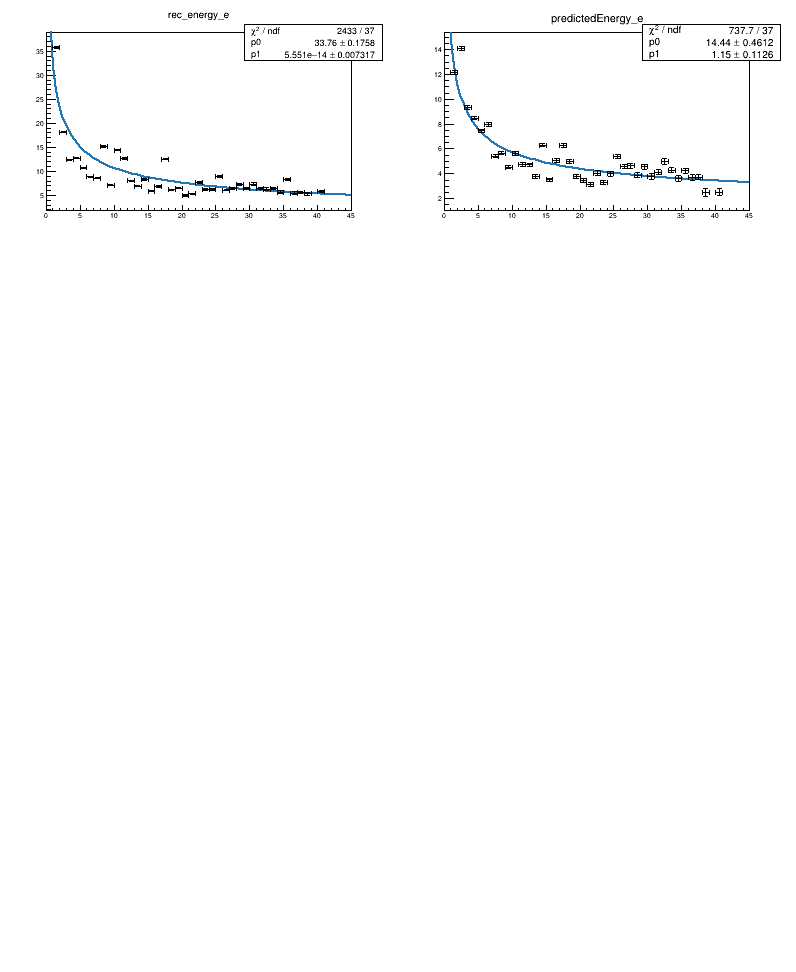

In [17]:
ROOT.gStyle.SetOptStat("emr")
ROOT.gStyle.SetOptFit(1)

c2 = ROOT.TCanvas("c2", "c2", 800, 1000)
c2.Divide(2,4)
c2.SetLeftMargin(.12)
c2.SetBottomMargin(.12)
c2.SetRightMargin(.12)
c2.SetTopMargin(.12)

f1 = ROOT.TF1("f1","[0]/sqrt(x)+[1]")
f1.SetParameter(0, 30.)
f1.SetParLimits(0, 0., 1e3)
f1.SetParameter(1, 1.)
f1.SetParLimits(1, 0., 1e3)
f1.SetLineColor(palette['blue'].GetNumber())
gr = [None, None, None, None, None, None, None, None]

for i,col in enumerate(['rec_energy', 'predictedEnergy']):
    for j,s in enumerate(['e']):#, 'mu', 'gamma', 'pi']):
        idx = 2*j+i
        c2.cd(idx+1)
        x = array('f', data[col][s]['Energy'])
        n = len(x)
        y = array('f', data[col][s]['EnergyRes'])
        ex = array('f', [0.5*binwidth*1e-3]*len(data[col][s]['Energy']))
        ey = array('f', data[col][s]['EnergyResErr'])
#         ey = array('f', [0.]*n)
        gr[idx] = ROOT.TGraphErrors(n, x, y, ex, ey)
#         gr[idx] = ROOT.TGraph(n, x, y)
        gr[idx].SetTitle(col + "_" + s)
#         if i == 1:
        gr[idx].Fit(f1, "SEM+")
#         gr.SetMarkerStyle(marker[i])
    
        gr[idx].Draw('ap')

c2.Update()

labelsize = 0.03
titlesize = 0.04
titleoffset = 1.2
labeloffset = 0.005
linewidth = 3
ticklength = 0.02

# mg.GetXaxis().SetTitle("E_{true} [GeV]")
# mg.GetYaxis().SetTitle("#sigma/E_{reconstructed} [%]")
# mg.SetMinimum(0.)
# # mg.SetMaximum(16.)
# mg.GetXaxis().SetTickLength(ticklength)
# mg.GetYaxis().SetTickLength(ticklength)
# mg.GetXaxis().SetTitleSize(titlesize)
# mg.GetYaxis().SetTitleSize(titlesize)
# mg.GetXaxis().SetLabelSize(labelsize)
# mg.GetYaxis().SetLabelSize(labelsize)
# mg.GetXaxis().CenterTitle()
# mg.GetYaxis().CenterTitle()
# mg.GetXaxis().SetTitleOffset(titleoffset)
# mg.GetYaxis().SetTitleOffset(titleoffset)
# mg.GetXaxis().SetLabelOffset(labeloffset)
# mg.GetYaxis().SetLabelOffset(labeloffset)

# stats1 = gr[0].GetListOfFunctions().FindObject("stats")
# # stats2 = gr[1].GetListOfFunctions().FindObject("stats")
# stats1.SetTextColor(palette['blue'].GetNumber())
# # stats2.SetTextColor(palette['red'].GetNumber())
# stats1.SetX2NDC(1-c2.GetRightMargin()); stats1.SetX1NDC(stats1.GetX2NDC()-0.4)
# stats1.SetY2NDC(1-c2.GetTopMargin()-0.016); stats1.SetY1NDC(stats1.GetY2NDC()-0.12)
# # stats2.SetX2NDC(stats1.GetX2NDC()); stats2.SetX1NDC(stats1.GetX1NDC())
# # stats2.SetY2NDC(stats1.GetY1NDC()); stats2.SetY1NDC(stats2.GetY2NDC()-0.12)
# stats1.SetTextSize(labelsize)
# # stats2.SetTextSize(labelsize)
# stats1.SetBorderSize(0)
# # stats2.SetBorderSize(0)

# # add legend
# # x1 = c2.GetLeftMargin() + 0.03
# # x2 = x1 + 0.25
# # y2 = 1 - c2.GetTopMargin() - 0.03 - 0.01
# # y1 = y2 - 0.08
# # legend = ROOT.TLegend(x1, y1, x2, y2)
# # legend.SetFillColor(0)
# # legend.SetBorderSize(0)
# # legend.SetTextSize(labelsize)
# # # legend.AddEntry(gr[0], "electron", "p")
# # # legend.AddEntry(gr[1], "pion", "p")
# # legend.Draw()

c2.Modified()
c2.Print("energyres.png")
c2.Draw()

In [59]:
def plot_energyres(s, label, ymax, flag):

    ROOT.gStyle.SetOptStat("emr")
    ROOT.gStyle.SetOptFit(1)

    c2 = ROOT.TCanvas("c2", "c2", 600, 600)
    c2.SetLeftMargin(.12)
    c2.SetBottomMargin(.12)
    c2.SetRightMargin(.12)
    c2.SetTopMargin(.12)

    mg = ROOT.TMultiGraph()
    gr = [None, None]
    f1 = [None, None]
    f1[0] = ROOT.TF1("f1","[0]/sqrt(x)+[1]")
    f1[0].SetParameter(0, 30.)
    f1[0].SetParLimits(0, 0., 1e3)
    f1[0].SetParameter(1, 1.)
    f1[0].SetParLimits(1, 0., 1e3)
    f1[1] = f1[0].Clone()
    f1[0].SetLineColor(palette['green'].GetNumber())
    f1[1].SetLineColor(palette['orange'].GetNumber())
    marker = [ROOT.kFullDotLarge, ROOT.kFullTriangleUp]


    for i,col in enumerate(['rec_energy', 'predictedEnergy']):
#     for i,s in enumerate(['e-', 'pi-']):
        x = array('f', data[col][s]['Energy'])
        n = len(x)
        y = array('f', data[col][s]['EnergyRes'])
        ex = array('f', [0.5*binwidth*1e-3]*len(data[col][s]['Energy']))
        ey = array('f', data[col][s]['EnergyResErr'])
#         gr[i] = ROOT.TGraphErrors(n, x, y, ex, ey)
        gr[i] = ROOT.TGraph(n, x, y)
        if flag:
            gr[i].Fit(f1[i], "S")
        gr[i].SetMarkerStyle(marker[i])

        mg.Add(gr[i])
    mg.Draw('ap')

    c2.Update()

    ratio = 1.
    if not flag:
        ratio = 1.3
    ratio2 = 1.2*ratio
    linewidth = 1
    linespacing = 0.05

    if flag:
        ROOT.gPad.SetLeftMargin(0.15)
        ROOT.gPad.SetBottomMargin(0.15)
        ROOT.gPad.SetRightMargin(0.05)
        ROOT.gPad.SetTopMargin(0.05)
    else:
        ROOT.gPad.SetLeftMargin(0.17)
        ROOT.gPad.SetBottomMargin(0.17)
        ROOT.gPad.SetRightMargin(0.03)
        ROOT.gPad.SetTopMargin(0.03)
        
    mg.GetXaxis().SetTitle("E_{beam} [GeV]")
    mg.GetYaxis().SetTitle("(#sigma/E)_{reconstructed} [%]")
    mg.SetMinimum(0.)
    mg.SetMaximum(ymax)

    mg.GetXaxis().SetTickLength(0.7 * ratio * mg.GetXaxis().GetTickLength())
    mg.GetYaxis().SetTickLength(0.7 * ratio * mg.GetYaxis().GetTickLength())

    mg.GetYaxis().SetTitleSize(ratio2 * mg.GetYaxis().GetTitleSize())
    mg.GetXaxis().SetTitleSize(mg.GetYaxis().GetTitleSize())
    # mg.GetYaxis().SetTitleSize(ratio2 * mg.GetYaxis().GetTitleSize())

    labelsize = ratio * mg.GetXaxis().GetLabelSize()
    mg.GetXaxis().SetLabelSize(labelsize)
    mg.GetYaxis().SetLabelSize(labelsize)

    mg.GetXaxis().CenterTitle()
    mg.GetYaxis().CenterTitle()

    if flag:
        mg.GetXaxis().SetTitleOffset(ratio2 * mg.GetXaxis().GetTitleOffset()+0.2)
        mg.GetYaxis().SetTitleOffset(mg.GetXaxis().GetTitleOffset()+0.1)
    else:
        mg.GetXaxis().SetTitleOffset(ratio2 * mg.GetXaxis().GetTitleOffset()-0.1)
        mg.GetYaxis().SetTitleOffset(mg.GetXaxis().GetTitleOffset()+0.1)

    labeloffset = (ratio + 1) * mg.GetXaxis().GetLabelOffset()
    mg.GetXaxis().SetLabelOffset(labeloffset)
    mg.GetYaxis().SetLabelOffset(labeloffset)
    mg.GetXaxis().SetLimits(0., 45.);
    
    if flag or s == 'pi':
        #add legend
        x1 = c2.GetLeftMargin() + mg.GetYaxis().GetTickLength()+0.02
        x2 = x1 + 0.25
        y2 = 1 - c2.GetTopMargin() - mg.GetXaxis().GetTickLength()-0.02
        y1 = y2 - 2 * ratio * linespacing
        legend = ROOT.TLegend(x1, y1, x2, y2)
        legend.SetFillColor(0)
        legend.SetBorderSize(0)
        legend.SetTextSize(labelsize)
        l1 = legend.AddEntry(gr[0], "Analytical", "p")
        l2 = legend.AddEntry(gr[1], "Machine learning", "p")
        if flag:
            l1.SetTextColor(palette['green'].GetNumber())
            l2.SetTextColor(palette['orange'].GetNumber())
        legend.Draw()
#     x2 = 1-c2.GetRightMargin()-mg.GetYaxis().GetTickLength()
#     x1 = x2 - 0.4
#     y2 = 1-c2.GetTopMargin()-mg.GetXaxis().GetTickLength()-0.02
#     y1 = y2 - 1 * ratio * linespacing
#     legend = ROOT.TLegend(x1, y1, x2, y2)
#     legend.SetFillColor(0)
#     legend.SetBorderSize(0)
#     legend.SetTextSize(labelsize)
#     l1 = legend.AddEntry(gr[0], "Analytical", "p")
# #     l1.SetTextColor(palette['green'].GetNumber())
# #     l2 = legend.AddEntry(gr[1], "Machine learning", "p")
# #     l2.SetTextColor(palette['orange'].GetNumber())
#     legend.Draw()
    
    if flag:
        stats1 = gr[0].GetListOfFunctions().FindObject("stats")
        stats2 = gr[1].GetListOfFunctions().FindObject("stats")
        stats1.SetTextColor(palette['green'].GetNumber())
        stats2.SetTextColor(palette['orange'].GetNumber())
        stats1.SetX2NDC(1-c2.GetRightMargin()-mg.GetYaxis().GetTickLength())
        stats1.SetX1NDC(stats1.GetX2NDC()-0.4)
        stats1.SetY2NDC(1-c2.GetTopMargin()-mg.GetXaxis().GetTickLength()-0.02)
        stats1.SetY1NDC(stats1.GetY2NDC()-3 * ratio * linespacing)
        stats2.SetX2NDC(stats1.GetX2NDC())
        stats2.SetX1NDC(stats1.GetX1NDC())
        stats2.SetY2NDC(stats1.GetY1NDC())
        stats2.SetY1NDC(stats2.GetY2NDC()-3 * ratio * linespacing)
        stats1.SetTextSize(labelsize)
        stats2.SetTextSize(labelsize)
        stats1.SetBorderSize(0)
        stats2.SetBorderSize(0)
        
    if not flag:
        t3 = ROOT.TLatex(1-ROOT.gPad.GetRightMargin()-2*mg.GetYaxis().GetTickLength()+0.01, 
                            1-ROOT.gPad.GetTopMargin()-2*mg.GetXaxis().GetTickLength(), label)
        t3.SetTextSize(2*labelsize)
        t3.SetTextFont(42)
        t3.SetTextAlign(ROOT.kHAlignRight+ROOT.kVAlignTop)
        t3.SetNDC(ROOT.kTRUE)
        t3.Draw()

    c2.SetTicks(1, 1)

    c2.Modified()
    c2.Draw()
    c2.Print("energyres_er_"+s+".png")

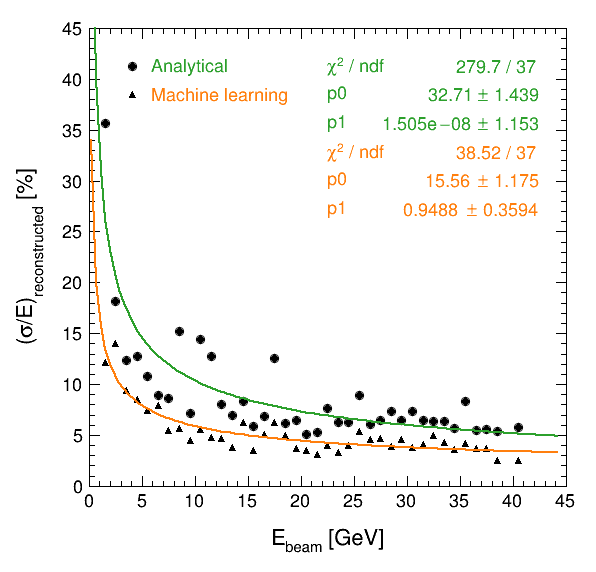


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      279.729
NDf                       =           37
Edm                       =   8.2327e-08
NCalls                    =           76
p0                        =      32.7074   +/-   1.43913      	 (limited)
p1                        =  1.50471e-08   +/-   1.15292      	 (limited)

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      38.5182
NDf                       =           37
Edm                       =  7.86032e-09
NCalls                    =           75
p0                        =      15.5644   +/-   1.17458      	 (limited)
p1                        =     0.948845   +/-   0.359418     	 (limited)


Info in <TCanvas::Print>: png file energyres_er_e.png has been created


In [60]:
from IPython.display import Image
plot_energyres('e', 'e', 45, True)
Image(filename='energyres_er_e.png')

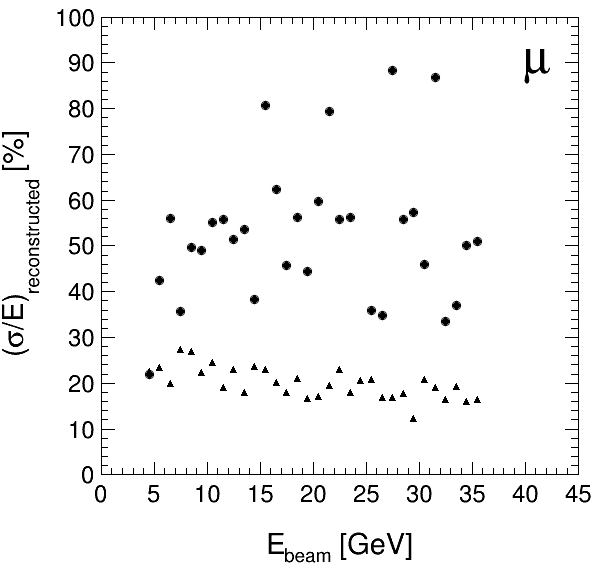

Info in <TCanvas::Print>: png file energyres_er_mu.png has been created


In [61]:
plot_energyres('mu', '#mu', 100, False)
Image(filename='energyres_er_mu.png') 

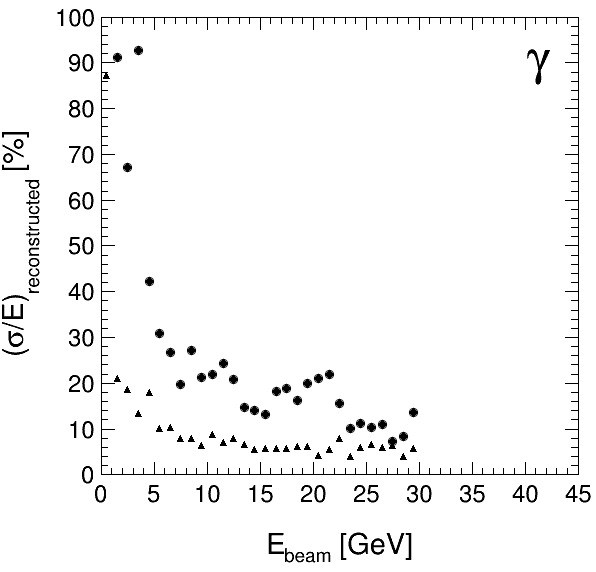

Info in <TCanvas::Print>: png file energyres_er_gamma.png has been created


In [62]:
plot_energyres('gamma', '#gamma', 100, False)
Image(filename='energyres_er_gamma.png') 

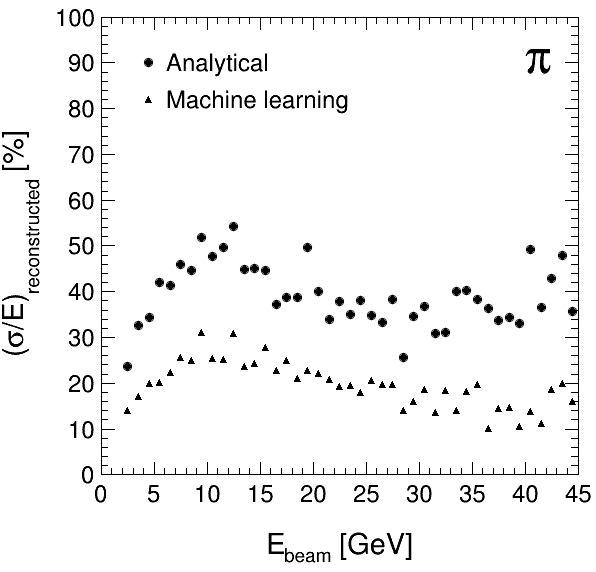

Info in <TCanvas::Print>: png file energyres_er_pi.png has been created


In [63]:
plot_energyres('pi', '#pi', 100, False)
Image(filename='energyres_er_pi.png') 

In [ ]:
c3 = ROOT.TCanvas("c3", "c3", 600, 600)
gr = [None, None]

ratio = 1.1
ratio2 = 1.2*ratio
linewidth = 1
linespacing = 0.05

mg = ROOT.TMultiGraph()
for i,s in enumerate(['e-', 'pi-']):
    x = array('f', data2[s]['EnergyTrue'])
    n = len(x)
    y = array('f', data2[s]['EnergyMeasRatio'])
    ex = array('f', [0.]*n)
    ey = array('f', data2[s]['EnergyMeasRatioErr'])
    gr[i] = ROOT.TGraphErrors(n, x, y, ex, ey)
    mg.Add(gr[i])

    gr[i].SetMarkerStyle(marker[i])

    ROOT.gPad.SetLeftMargin(0.2)
    ROOT.gPad.SetBottomMargin(0.13)
    ROOT.gPad.SetRightMargin(0.2)
    ROOT.gPad.SetTopMargin(0.07)
    
    gr[i].SetMarkerColor(palette[s].GetNumber())

mg.GetXaxis().SetTitle("E_{beam} [GeV]")
mg.GetXaxis().CenterTitle()

mg.GetYaxis().SetTitle("E_{reconstructed} / E_{beam}")
mg.GetYaxis().CenterTitle()

mg.GetYaxis().SetTitleSize(ratio2 * mg.GetYaxis().GetTitleSize())
mg.GetXaxis().SetTitleSize(mg.GetYaxis().GetTitleSize())

labelsize = ratio * mg.GetXaxis().GetLabelSize()
mg.GetXaxis().SetLabelSize(labelsize)
mg.GetYaxis().SetLabelSize(labelsize)

labeloffset = (ratio + 1) * mg.GetXaxis().GetLabelOffset()
mg.GetXaxis().SetLabelOffset(labeloffset)
mg.GetYaxis().SetLabelOffset(labeloffset)

mg.GetXaxis().SetLimits(5., 105.)

mg.GetXaxis().SetTitleOffset(ratio2 * mg.GetXaxis().GetTitleOffset()+0.05)
mg.GetYaxis().SetTitleOffset(mg.GetXaxis().GetTitleOffset() + 0.5)

mg.GetXaxis().SetTickLength(0.7 * ratio * mg.GetXaxis().GetTickLength())
mg.GetYaxis().SetTickLength(0.7 * ratio * mg.GetYaxis().GetTickLength())
    
mg.Draw("ap")

mg.SetMinimum(0.84)
mg.SetMaximum(1.02)
c3.SetTicks(1, 1)

# add legend
x2 = 1-ROOT.gPad.GetRightMargin()-mg.GetYaxis().GetTickLength()
y1 = ROOT.gPad.GetBottomMargin()+mg.GetXaxis().GetTickLength()
legend = ROOT.TLegend(x2-0.2, y1, x2, y1+2 * ratio * linespacing)
legend.SetFillColor(0)
legend.SetBorderSize(0)
legend.SetTextSize(labelsize)
legend.AddEntry(gr[0], "Electron", "pe")
legend.AddEntry(gr[1], "Pion", "pe")
legend.Draw()

c3.Print("energymean.png")

c3.Draw()